Cluster
0    1136
2       1
1       1
4       1
3       1
Name: count, dtype: int64


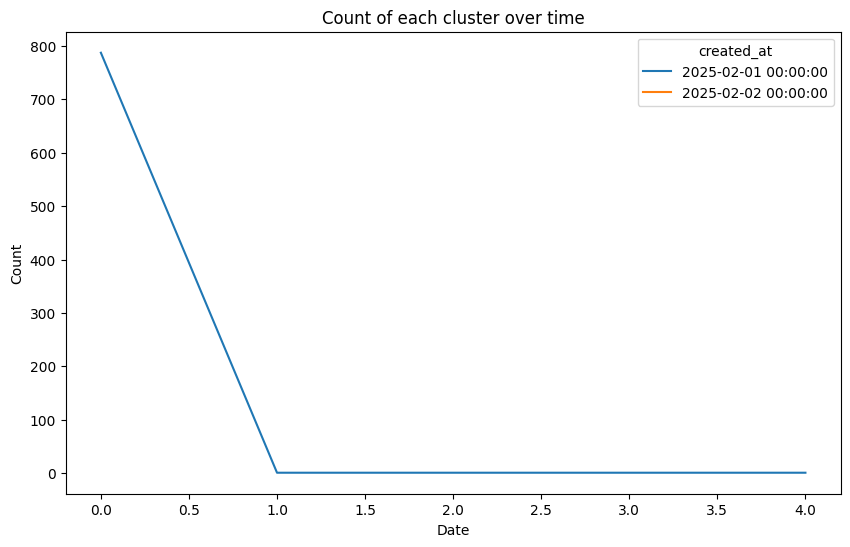

In [9]:
# import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import LabelEncoder

def get_first_two_lines(text, delimiter):
    lines = text.split(delimiter)
    return '\n'.join(lines[:2])

# st.title("Clustering errors")

#table_name = st.text_input(label="Enter the table to cluster on", key="st_table_name", value="")

# User input for columns to cluster on
# columns = st.multiselect(label="Select columns used for clustering", options=['account id', 'module type', 'Error'])

# User input for number of clusters
# num_clusters = st.number_input(label="Enter the number of clusters", value=5)

# start_date = st.date_input("Start date", pd.to_datetime("2023-01-01"))
# end_date = st.date_input("End date", pd.to_datetime("2023-03-01"))

df = pd.read_excel('Sandbox_Errors.xlsx')

# Trim the Error column to only show the first two lines
df['Error'] = df['additional_data'].apply(lambda x: get_first_two_lines(x, '\\\\n'))

df.to_excel('Sandbox_Errors_trimmed.xlsx')

tfid_vectorizer = TfidfVectorizer()

# label_encoder = LabelEncoder()
# df['module_type_encoded'] = label_encoder.fit_transform(df['module_type'])

kmeans = KMeans(n_clusters=5, random_state=42)

pipeline = Pipeline(steps=[
    ('features', ColumnTransformer(
        transformers=[
            # ('account_id', 'passthrough', ['account id']),  
            #('module_type', 'passthrough', ['module_type_encoded']),  # Leave the encoded 'module_type' as is
            ('error', tfid_vectorizer, 'Error')  # Transform 'Error' column using TF-IDF
        ])),
    ('scaler', StandardScaler(with_mean=False)),  # Optional: Scale the features to normalize the variance
    ('kmeans', kmeans)  # Apply KMeans clustering
])

df['Cluster'] = pipeline.fit_predict(df)

# print count of each cluster 
print(df['Cluster'].value_counts())


# For count of rows for each cluster we can use the 'Cluster' column in the data frame, and for time we can use the 'created_at' column
df['created_at'] = pd.to_datetime(df['created_at'])

#Show a plot of count of each cluster with time on the x-axis
df.groupby(['Cluster', pd.Grouper(key='created_at', freq='D')]).size().unstack().plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of each cluster over time')
plt.show()


In [5]:
# Count no. of unique clusters 
print(f"Number of unique clusters: {df['Cluster'].nunique()}")



Number of unique clusters: 5
